<a href="https://colab.research.google.com/github/alinaprolygina/osda/blob/main/NeuralFCA_Big_hw_data3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libs

In [1]:
import sys
print(sys.executable)


/usr/bin/python3


In [2]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [4]:
import torch

In [5]:
!pip3 install 'fcapy[all]'
!pip3 install frozendict
!pip3 install ipynb
!pip3 install sparselinear
!pip3 install bitsets
!pip3 install bitarray
import torch
!pip3 install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip3 install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip3 install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip3 install git+https://github.com/pyg-team/pytorch_geometric.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.9/162.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.9/279.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=b9086680b81bf577c5575e2a12d7496f1534e1331dfdd169d4032ea293864251
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=495091 sha256=73e918b8b471c403e8b70fab5132f5dbe4aed8f3fe8c679e4abecfa01eb85dfe
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1035675 sha256=20c633e088148bfd119ddc9e23218f187ed53b035cbeb561d78d21a2bbe59e6a
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully buil

In [14]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice

In [15]:
from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

In [16]:
import neural_lib as nl

In [17]:
df = pd.read_csv('heart.csv', header=0)

print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

# Pipeline

# Step 0. Binarize the data

In [18]:
df_bin = df  # Skip this part as the data is already binary

# Binarization of age
df_bin['age_<40'] = df_bin['age'] < 40
df_bin['age_40-60'] = df_bin['age'].between(40, 60)
df_bin['age_>60'] = df_bin['age'] > 60

# Binarization of resting blood pressure (trestbps)
df_bin['trestbps_<120'] = df_bin['trestbps'] < 120
df_bin['trestbps_120-140'] = df_bin['trestbps'].between(120, 140)
df_bin['trestbps_>140'] = df_bin['trestbps'] > 140

# Binarization of serum cholesterol (chol)
df_bin['chol_<200'] = df_bin['chol'] < 200
df_bin['chol_200-239'] = df_bin['chol'].between(200, 239)
df_bin['chol_>239'] = df_bin['chol'] > 239

# Binarization of ST depression (oldpeak)
df_bin['oldpeak_>2'] = df_bin['oldpeak'] > 2

# One-hot encoding for cp, restecg, slope, ca, thal
ohe = OneHotEncoder()
ohe_df = pd.DataFrame(ohe.fit_transform(df[['cp', 'restecg', 'slope', 'ca', 'thal']]).toarray())

# Getting column names from one-hot encoder
ohe_columns = ohe.get_feature_names_out(['cp', 'restecg', 'slope', 'ca', 'thal'])
ohe_df.columns = ohe_columns

# Merging the original dataframe with one-hot encoded data
df_bin = df_bin.join(ohe_df)

# Removing old columns
df_bin.drop(['age', 'trestbps', 'chol', 'oldpeak', 'cp', 'restecg', 'slope', 'ca', 'thal', 'thalach', 'thal_0', 'ca_4', 'restecg_2', 'age_<40'], axis=1, inplace=True)

# Saving the "DEATH_EVENT" column into a separate variable
targ = df_bin['target']

# Removing the "DEATH_EVENT" column from the original dataframe
df_bin = df_bin.drop('target', axis=1)

# Adding the "DEATH_EVENT" column back into the dataframe, placing it at the end
df_bin['target'] = targ

# Printing the first few rows of the updated dataframe
print(df_bin.head())


   sex  fbs  exang  age_40-60  age_>60  trestbps_<120  trestbps_120-140  \
0    1    1      0      False     True          False             False   
1    1    0      0      False    False          False              True   
2    0    0      0       True    False          False              True   
3    1    0      0       True    False          False              True   
4    0    0      1       True    False          False              True   

   trestbps_>140  chol_<200  chol_200-239  ...  slope_1  slope_2  ca_0  ca_1  \
0           True      False          True  ...      0.0      0.0   1.0   0.0   
1          False      False         False  ...      0.0      0.0   1.0   0.0   
2          False      False          True  ...      0.0      1.0   1.0   0.0   
3          False      False          True  ...      0.0      1.0   1.0   0.0   
4          False      False         False  ...      0.0      1.0   1.0   0.0   

   ca_2  ca_3  thal_1  thal_2  thal_3  target  
0   0.0   0.0     1.

Split the data to train and test

In [19]:
for column in df_bin.columns:
    df_bin[column] = pd.to_numeric(df_bin[column], errors='coerce')

df_bin = df_bin.replace({1: True, 0: False})

# df_bin['target'].value_counts()

df_bin


,sex,fbs,exang,age_40-60,age_>60,trestbps_<120,trestbps_120-140,trestbps_>140,chol_<200,chol_200-239,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3,target
0,True,True,False,False,True,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,True
1,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,True
2,False,False,False,True,False,False,True,False,False,True,...,False,True,True,False,False,False,False,True,False,True
3,True,False,False,True,False,False,True,False,False,True,...,False,True,True,False,False,False,False,True,False,True
4,False,False,True,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,True,True,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,True,False
299,True,False,False,True,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
300,True,True,False,False,True,False,False,True,True,False,...,True,False,False,False,True,False,False,False,True,False
301,True,False,True,True,False,False,True,False,True,False,...,True,False,False,True,False,False,False,False,True,False


In [20]:
from sklearn.model_selection import train_test_split
y_feat = 'target'
# # Total number of rows in the dataset
# total_rows = len(df_bin)

# # Size of the test sample
# test_size = 150

# # Index from which the data will go into the test sample
# test_start_index = total_rows - test_size

# # Split into training and test sets
# df_train = df_bin.iloc[:test_start_index]
# df_test = df_bin.iloc[test_start_index:]
df_train, df_test = train_test_split(df_bin, train_size=0.7, random_state=0)

In [21]:
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]

In [22]:
print("Unique class labels in the training set:", y_train.unique())
# Counting the number of samples for each class in the training dataset
class_counts = y_train.value_counts()
print("Class counts in training set:")
print(class_counts)

# Optionally, you can calculate the percentage ratio for each class
class_proportions = class_counts / len(y_train)
print("\nClass proportions in training set:")
print(class_proportions)


Unique class labels in the training set: [ True False]
Class counts in training set:
True     118
False     94
Name: target, dtype: int64

Class proportions in training set:
True     0.556604
False    0.443396
Name: target, dtype: float64


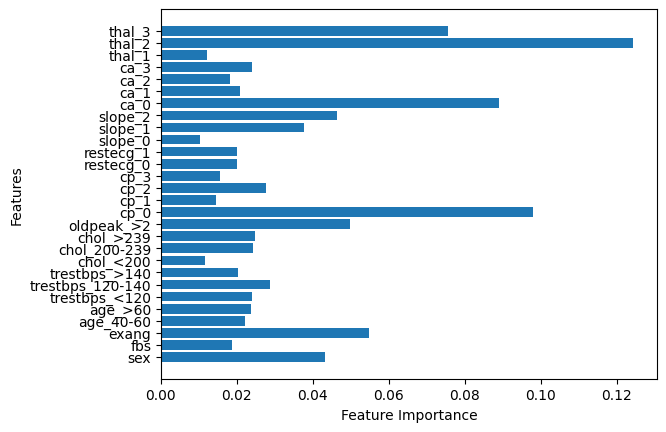

In [23]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Training the random forest to assess the importance of features
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Visualization of feature importances
plt.barh(X_train.columns, rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


## Step 1. Build Monotone Concept Lattice

Put binarized data in FormalContext and compute monotone ConceptLattice

In [24]:
# X_train.index = X_train.index.map(str)
# K_train = FormalContext.from_pandas(X_train)
K_train = FormalContext(data=X_train.values, target = y_train.values, attribute_names=X_train.columns)
K_train

FormalContext (212 objects, 28 attributes, 1958 connections)
   |sex|fbs|exang|age_40-60|age_>60|...|ca_2|ca_3|thal_1|thal_2|thal_3|
0  |  X|  X|     |         |      X|...|    |    |      |     X|      |
1  |  X|  X|     |         |      X|...|    |    |      |     X|      |
2  |  X|   |    X|         |      X|...|    |    |      |      |     X|
3  |  X|   |     |         |       |...|    |    |      |     X|      |
4  |  X|   |    X|         |      X|...|    |    |      |      |     X|
5  |  X|   |    X|         |      X|...|    |   X|     X|      |      |
6  |  X|   |    X|        X|       |...|    |    |      |      |     X|
7  |  X|   |     |        X|       |...|    |    |      |     X|      |
8  |  X|  X|     |        X|       |...|   X|    |     X|      |      |
9  |   |  X|     |         |      X|...|    |   X|      |     X|      |
.......................................................................
.......................................................................
202

In [25]:
L = ConceptLattice.from_context(K_train, algo='Sofia', is_monotone=True)
len(L)

96

Compute F1 score for each formal concept  (assuming that an object is predicted True if it is in the extent of the concept)

In [26]:
from sklearn.metrics import f1_score
from frozendict import frozendict

for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1

    # Copying and modifying data
    updated_measures = dict(c.measures)
    updated_measures['f1_score'] = f1_score(y_train, y_preds)

    # Updating c.measures with the new frozendict
    c.measures = frozendict(updated_measures)

# for c in L:
#     y_preds = np.zeros(K_train.n_objects)
#     y_preds[list(c.extent_i)] = 1
#     c.measures['f1_score'] = f1_score(y_train, y_preds)

Select indices of the best concepts from the lattice

In [59]:
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:11])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

Construct neural network based on concept lattice

In [60]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

Setup visuzalier for the architecture

In [61]:
vis = LineVizNx(node_label_font_size=5, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

Move the nodes in visualization to make it look pretty

In [62]:
# vis.init_mover_per_poset(cn.poset)
# mvr = vis.mover
# for a, b in [(11, 15), (2, 3), (2,8), (2, 4), (4,5), (24, 26), (22, 26), (23, 25), (22, 24), (6, 7), ]:
#     mvr.swap_nodes(a, b)

# for nodes, vert in [
#     ([19, 18], 0), ([23, 22], 5), ([14, 21,20], 1), ([13, 24, 25], 6), ([26], 7), ([9, 15], 8)
# ]:
#     for a in nodes:
#         mvr.place_node(a, mvr.posx[vert])

In [63]:
descr = {'fbs', 'chol_>239', 'cp_2'}

traced = cn.trace_description(descr, include_targets=False)

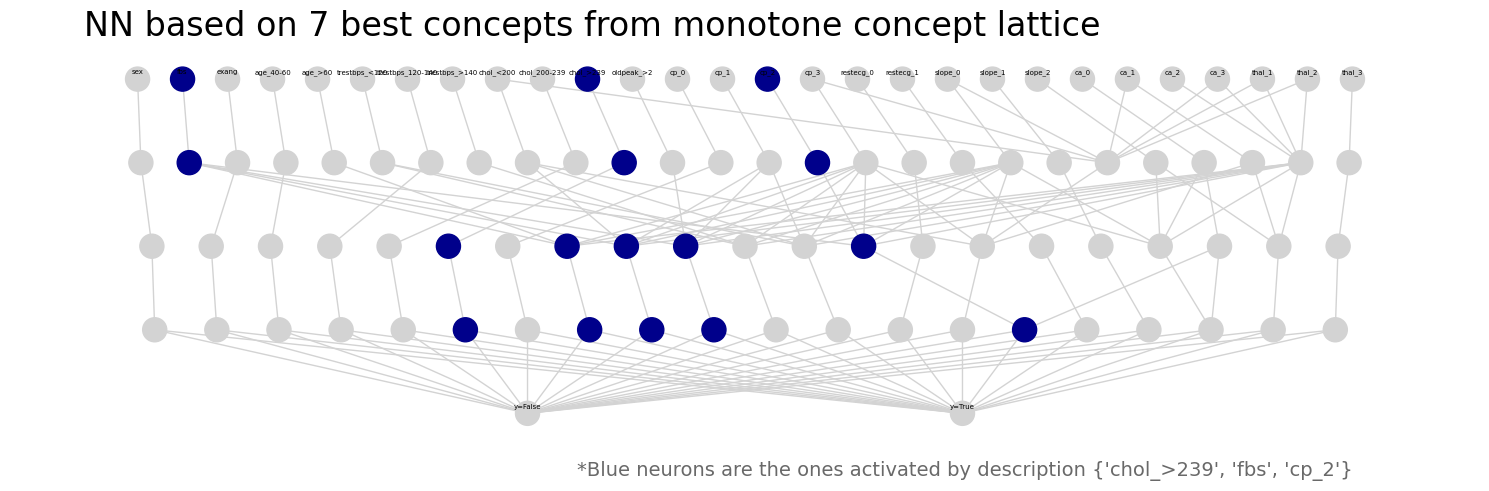

In [64]:
fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))]
)
plt.title(f'NN based on 7 best concepts from monotone concept lattice', loc='left', x=0.05, size=24)

plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3, f'*Blue neurons are the ones activated by description {descr}', fontsize=14, ha='right', color='dimgray')

plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [65]:
cn.fit(X_train, y_train)

In [66]:
from sklearn.metrics import accuracy_score
# Evaluation on the training set
train_pred = cn.predict(X_train)
print("Accuracy on the training set:", accuracy_score(y_train, train_pred))

# Evaluation on the test set
test_pred = cn.predict(X_test)
print("Accuracy on the test set:", accuracy_score(y_test, test_pred))

Accuracy on the training set: 0.8726415094339622
Accuracy on the test set: 0.7472527472527473


Now fit the network

To obtain the prediction

In [67]:
print('Class prediction', cn.predict(X_test).numpy())
print('Class prediction with probabilities', cn.predict_proba(X_test).detach().numpy())
print('True class', y_test.values)

Class prediction [0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0]
Class prediction with probabilities [[9.85338449e-01 1.46615533e-02]
 [4.36211258e-01 5.63788712e-01]
 [4.36211258e-01 5.63788712e-01]
 [9.99952555e-01 4.74283224e-05]
 [9.99952555e-01 4.74283224e-05]
 [9.98226583e-01 1.77344470e-03]
 [3.71989995e-01 6.28009975e-01]
 [9.99952555e-01 4.74283224e-05]
 [9.99409318e-01 5.90639480e-04]
 [9.99952555e-01 4.74283224e-05]
 [9.23054218e-01 7.69457817e-02]
 [7.27579800e-06 9.99992728e-01]
 [9.99952555e-01 4.74283224e-05]
 [7.79651873e-06 9.99992251e-01]
 [7.80554037e-05 9.99921918e-01]
 [8.55214239e-06 9.99991417e-01]
 [9.99952555e-01 4.74283224e-05]
 [9.79790092e-01 2.02099718e-02]
 [9.99952555e-01 4.74283224e-05]
 [9.98226583e-01 1.77344470e-03]
 [9.06496134e-05 9.99909401e-01]
 [5.91091692e-01 4.08908367e-01]
 [9.99857187e-01 1.42812365e-04]
 [

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = cn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.7472527472527473, Precision: 0.7307692307692307, Recall: 0.8085106382978723, F1 Score: 0.7676767676767676


Let us look at the fitted weights of edges

In [47]:
edge_weights = cn.edge_weights_from_network()

/usr/local/lib/python3.10/dist-packages/sparselinear/sparselinear.py:301: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:605.)
  weight = torch.sparse.FloatTensor(self.indices, self.weights, (self.out_features, self.in_features))


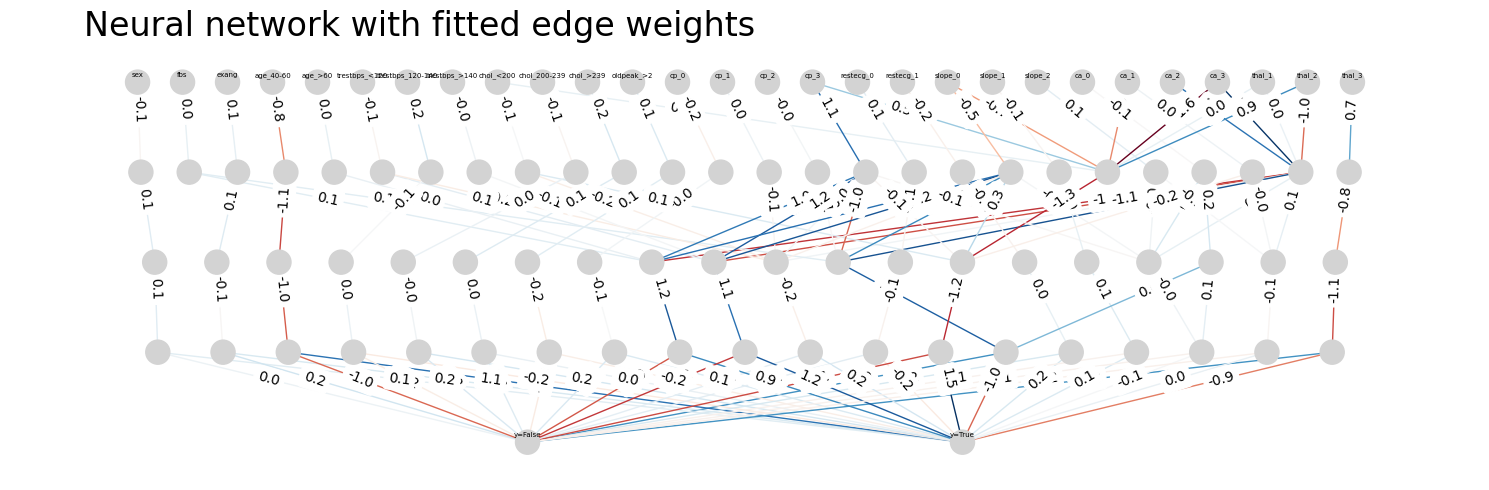

In [48]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_network3.png')
plt.show()